In [35]:
import pandas as pd
import numpy as np
#from scipy.sparse._base import _spbase
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import lightgbm as lgb
from joblib import dump, load
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor, plot_importance

# Preprocessing

In [3]:
df = pd.read_csv('C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/granulometry_v2.csv', encoding='utf-8', delimiter=';')

In [ ]:
dff = df
dff['Время'] = pd.to_datetime(dff['Время'])
dff = dff.dropna()
dff["часы"] = dff["Время"].dt.hour
dff["минуты"] = dff["Время"].dt.minute
dff = dff.drop(columns='Время')

In [5]:
dff = dff.drop(columns=['Мощность МПСИ 2 кВт', 'Мощность МШЦ 2 кВт', 'Ток МПСИ 2 А', 'Ток МШЦ 2 А', 'Исходное питание МПСИ 2 т/ч', 'Возврат руды МПСИ 2 т/ч', 'Общее питание МПСИ 2 т/ч', 
                        'Расход воды МПСИ 2 PV м3/ч', 'Расход воды МПСИ 2 SP м3/ч', 'Расход воды МПСИ 2 CV %', 'факт соотношение руда/вода МПСИ 2', 'Давление на подшипник МПСИ 2 загрузка Бар', 
                        'Давление на подшипник МПСИ 2 разгрузка Бар', 'Обороты насоса 2 1 %', 'Давление в ГЦ насоса 2 1 Бар', 'Расход в ГЦ насоса 2 1 м3/ч', 'Расход оборотной воды 2 м3/ч', 'Гранулометрия 2 %', 
                        'Поток 2 л/мин'])

In [6]:
for i in range(len(dff.columns)):
    print(f'Max: {max(list(dff[dff.columns[i]]))}')
    print(f'Min: {min(list(dff[dff.columns[i]]))}')

Max: 3980.128662109375
Min: 0.0
Max: 4008.949951171875
Min: 0.0
Max: 446.0317993164063
Min: 0.0
Max: 437.7989196777344
Min: 0.0
Max: 2189.289794921875
Min: 0.0
Max: 363.27935791015625
Min: 0.0
Max: 885.4281005859375
Min: 0.0
Max: 198.7525329589844
Min: 0.0
Max: 184.64859008789065
Min: 0.0
Max: 100.0
Min: 0.0
Max: 136.7268829345703
Min: 0.0
Max: 71.37843322753906
Min: 0.0
Max: 65.53382873535156
Min: 0.0
Max: 50.5
Min: 0.0
Max: 48.20000076293945
Min: 0.0
Max: 46.441707611083984
Min: 0.0
Max: 79.49332427978516
Min: 0.0
Max: 102.70915985107422
Min: 0.0
Max: 68.18767547607422
Min: 0.0
Max: 55.49828720092773
Min: 6.264974594116211
Max: 54.15082550048828
Min: 9.90000057220459
Max: 47.10000228881836
Min: 15.90000057220459
Max: 65.2390365600586
Min: 11.02500057220459
Max: 2400.0
Min: 0.0
Max: 100.0
Min: 9.024049758911133
Max: 95.001220703125
Min: 0.0
Max: 1.7455870371598468
Min: 0.0
Max: 1.600000023841858
Min: 1.0
Max: 13.999381065368652
Min: 1.0
Max: 43.79103469848633
Min: -20.0
Max: 99.972793

In [7]:
X = dff.drop(columns=['Гранулометрия 1 %'])
y = dff['Гранулометрия 1 %'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

# Random Forest 

In [18]:
RandomForest = RandomForestRegressor(
    n_estimators=2500,
    max_depth=15,
    random_state=42,
    min_samples_leaf=20,
    max_features=0.4,
    n_jobs=-1,
)

history_RFR = RandomForest.fit(X_train, y_train)

y_pred_train_RF = RandomForest.predict(X_train)
y_pred_test_RF = RandomForest.predict(X_test)

In [19]:
print(f'TRAIN:\n{r2_score(y_pred_train_RF, y_train)}')
print(mean_absolute_error(y_pred_train_RF, y_train))
print(mean_squared_error(y_pred_train_RF, y_train))

print(f'TEST:\n{r2_score(y_pred_test_RF, y_test)}')
print(mean_absolute_error(y_pred_test_RF, y_test))
print(mean_squared_error(y_pred_test_RF, y_test))

TRAIN:
0.998816132374572
0.4930116180254502
1.8353796177253168
TEST:
0.998710683418861
0.523814977916026
1.9910919600109644


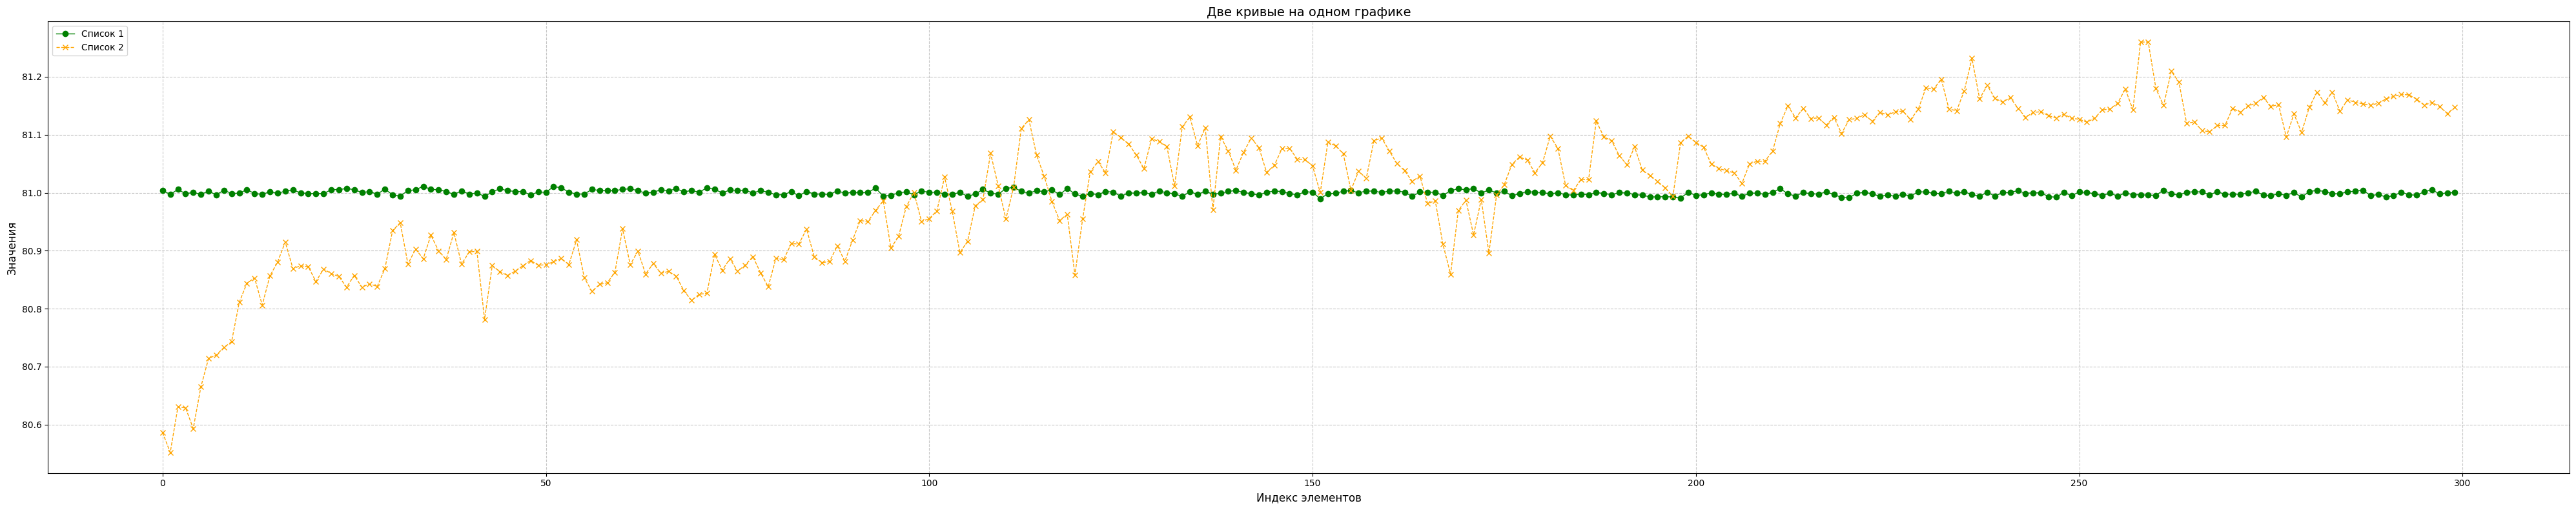

In [25]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
res = RandomForest.predict(trand_X)

x1 = list(range(len(trand_y)))
plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')              
plt.grid(True, linestyle='--', alpha=0.7) 

plt.tight_layout()  
plt.show()
#plt.savefig('plot_trand.png')

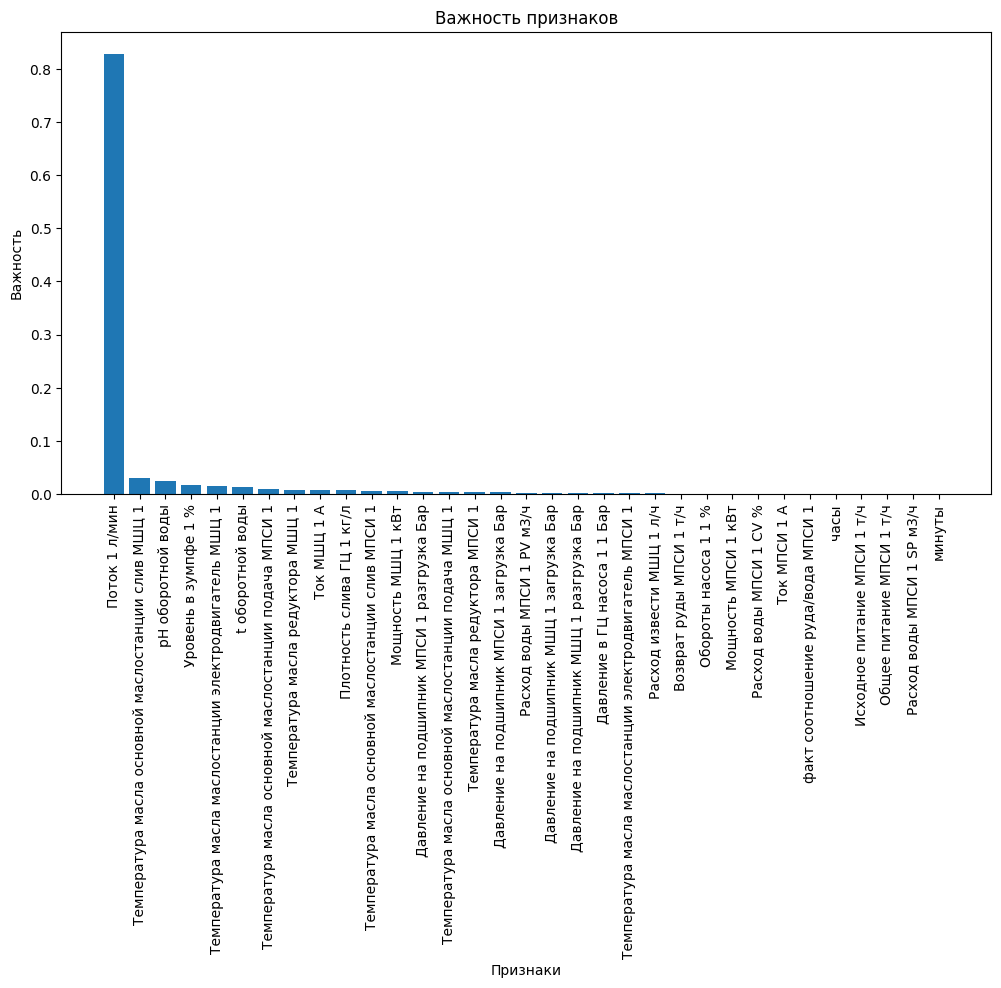

In [26]:
importances = history_RFR.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()

In [28]:
dump(RandomForest, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/RandomForestRegressor.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/RandomForestRegressor.joblib']

# XGBoost   

In [30]:
scaler_XGB = StandardScaler()
X_train_XGB = pd.DataFrame(columns=X_train.columns)
X_test_XGB = pd.DataFrame(columns=X_test.columns)
X_train_XGB[X_train_XGB.columns] = scaler_XGB.fit_transform(X_train)
X_test_XGB[X_test_XGB.columns] = scaler_XGB.transform(X_test)
dump(scaler_XGB, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_XGB.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_XGB.joblib']

In [34]:
XGB = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=10000,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.95,
    gamma = 0.2,
    reg_lambda = 0.1,
    reg_alpha = 0.1,
    min_child_weight = 10,
    tree_method='hist',
    booster = 'gbtree',
    n_jobs=-1,
    random_state=42,
    eval_metric=['rmse','mae'],
    early_stopping_rounds=50
)

XGB.fit(
    X_train_XGB, y_train,
    eval_set=[(X_train_XGB, y_train), (X_test_XGB, y_test)],
    verbose=10,
)

results_XGB = XGB.evals_result()

[0]	validation_0-rmse:35.54407	validation_0-mae:33.05645	validation_1-rmse:35.48272	validation_1-mae:32.98168
[10]	validation_0-rmse:12.84218	validation_0-mae:11.63238	validation_1-rmse:12.84000	validation_1-mae:11.60950
[20]	validation_0-rmse:5.48674	validation_0-mae:4.66179	validation_1-rmse:5.52754	validation_1-mae:4.66582
[30]	validation_0-rmse:3.30536	validation_0-mae:2.49584	validation_1-rmse:3.36541	validation_1-mae:2.51075
[40]	validation_0-rmse:2.68133	validation_0-mae:1.69232	validation_1-rmse:2.74851	validation_1-mae:1.70988
[50]	validation_0-rmse:2.43055	validation_0-mae:1.36961	validation_1-rmse:2.51277	validation_1-mae:1.38964
[60]	validation_0-rmse:2.29618	validation_0-mae:1.23450	validation_1-rmse:2.38181	validation_1-mae:1.25436
[70]	validation_0-rmse:2.19393	validation_0-mae:1.14318	validation_1-rmse:2.28383	validation_1-mae:1.16303
[80]	validation_0-rmse:2.10354	validation_0-mae:1.08587	validation_1-rmse:2.19496	validation_1-mae:1.10501
[90]	validation_0-rmse:2.01304

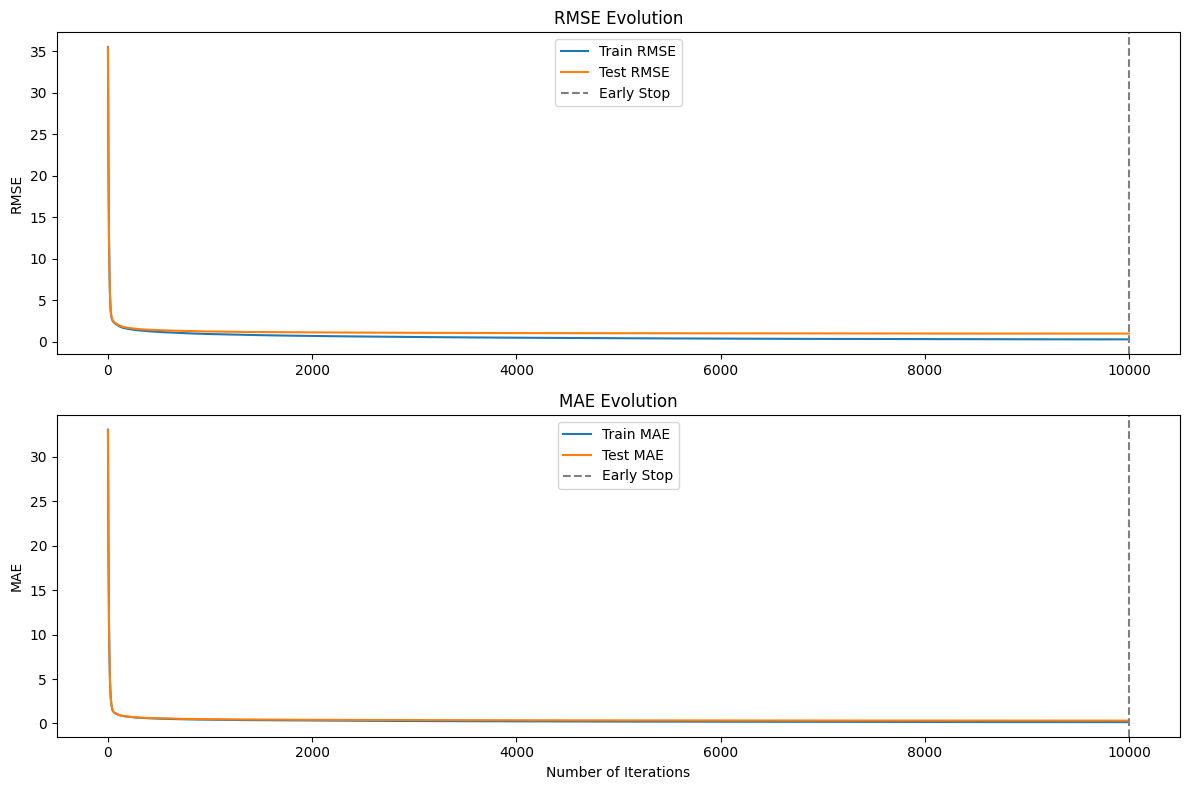

<Figure size 1000x600 with 0 Axes>

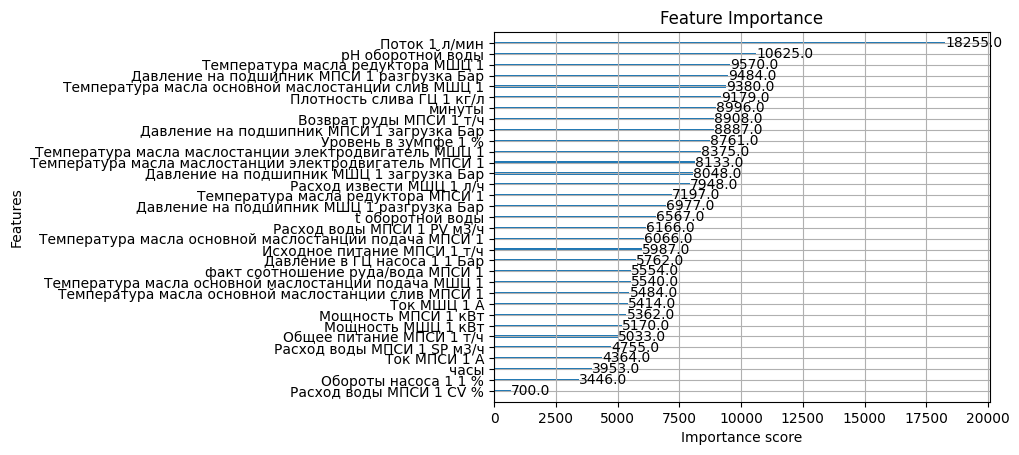

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(results_XGB['validation_0']['rmse'], label='Train RMSE')
plt.plot(results_XGB['validation_1']['rmse'], label='Test RMSE')
plt.axvline(
    XGB.best_iteration,
    color='gray',
    linestyle='--',
    label='Early Stop'
)

plt.title('RMSE Evolution')
plt.ylabel('RMSE')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(results_XGB['validation_0']['mae'], label='Train MAE')
plt.plot(results_XGB['validation_1']['mae'], label='Test MAE')
plt.axvline(
    XGB.best_iteration,
    color='gray',
    linestyle='--',
    label='Early Stop'
)

plt.title('MAE Evolution')
plt.ylabel('MAE')
plt.xlabel('Number of Iterations')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plot_importance(
    XGB,
    importance_type='weight',  # или 'gain', 'cover'
    max_num_features=40,
    title='Feature Importance'
)

plt.show()

In [38]:
y_pred_XGB_train = XGB.predict(X_train_XGB)
y_pred_XGB_test = XGB.predict(X_test_XGB)
print(f'Train:\nMSE: {mean_squared_error(y_train, y_pred_XGB_train)}\nMAE: {mean_absolute_error(y_train, y_pred_XGB_train)}\nR²: {r2_score(y_train, y_pred_XGB_train)}')
print(f'\nTest:\nMSE: {mean_squared_error(y_test, y_pred_XGB_test)}\nMAE: {mean_absolute_error(y_test, y_pred_XGB_test)}\nR²: {r2_score(y_test, y_pred_XGB_test)}')

Train:
MSE: 0.0808553046062984
MAE: 0.15330976893558046
R²: 0.9999480305415144

Test:
MSE: 0.9696896486339173
MAE: 0.3200142418836299
R²: 0.9993745229883327


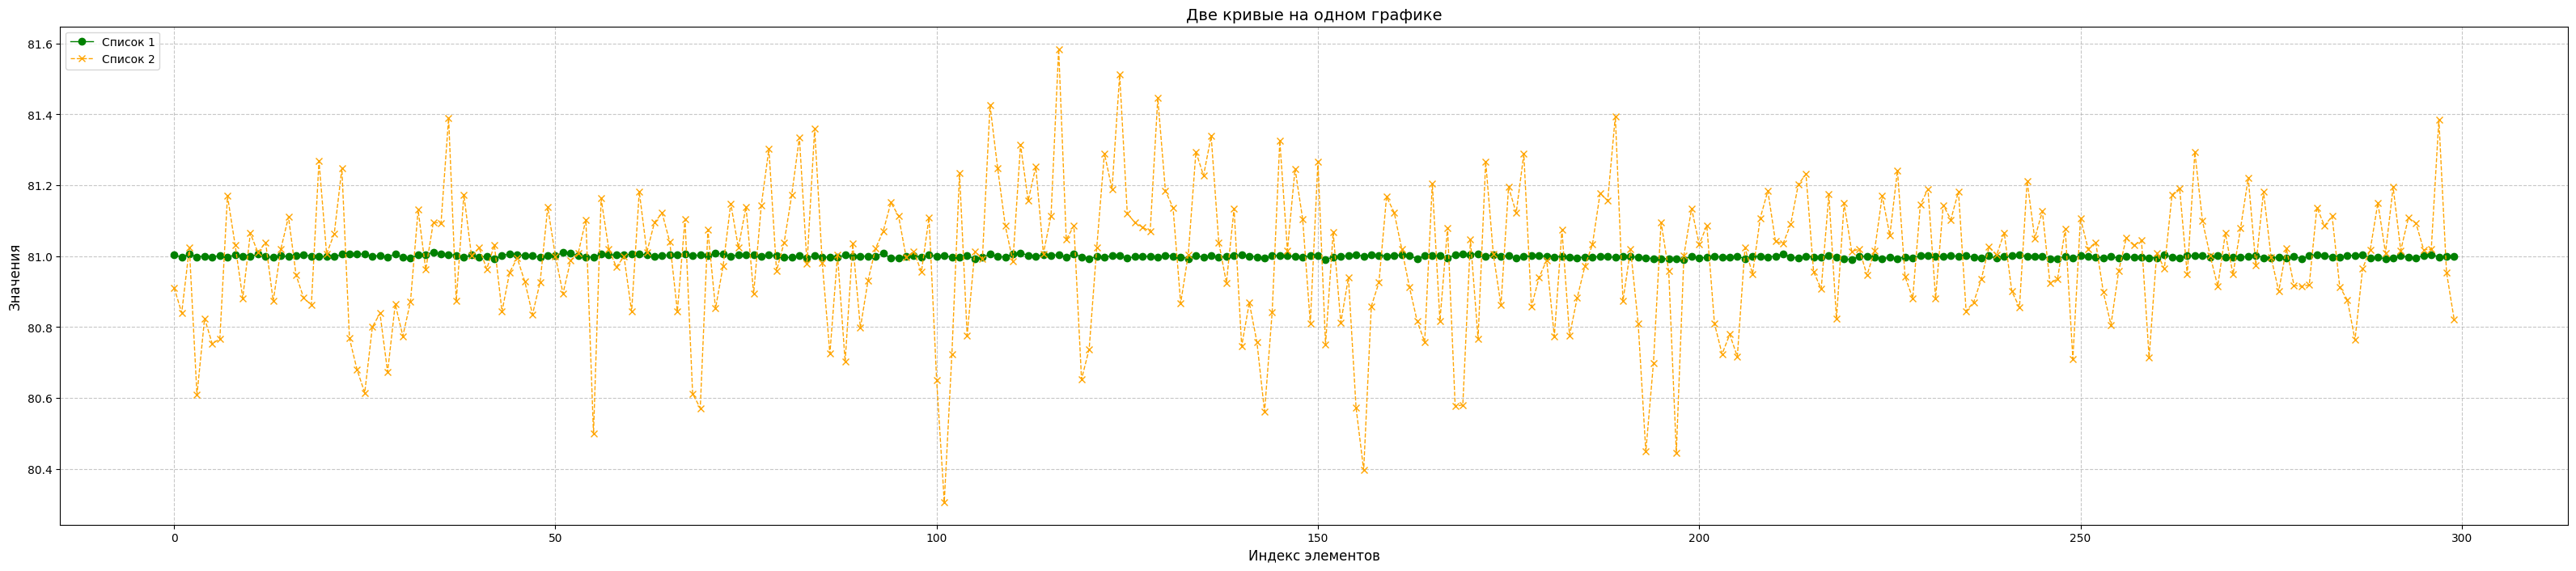

In [39]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
trand_X[trand_X.columns] = scaler_XGB.transform(trand_X[trand_X.columns])
res = XGB.predict(trand_X)

x1 = list(range(len(trand_y)))
plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')               
plt.grid(True, linestyle='--', alpha=0.7)  

plt.show()
#plt.savefig('plot_trand.png')

In [40]:
XGB.save_model('C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/XGBoost_model.json')

# CatBoost  

In [41]:
CB = CatBoostRegressor(
    loss_function='RMSE',         
    iterations=5000,             
    depth=5,                      
    learning_rate=0.08,
    subsample=0.95,                 
    colsample_bylevel=0.95,         
    l2_leaf_reg=1,              
    min_data_in_leaf=25,           
    thread_count=96,               
    random_seed=42,                
    eval_metric='RMSE',   
    verbose=10                   
)

CB.fit(
    train_pool,
    eval_set=[eval_pool],
    verbose=10
)

results = CB.get_evals_result()

0:	learn: 36.3484744	test: 36.2827620	best: 36.2827620 (0)	total: 213ms	remaining: 17m 42s
10:	learn: 16.3847739	test: 16.3435059	best: 16.3435059 (10)	total: 819ms	remaining: 6m 11s
20:	learn: 8.0099163	test: 7.9689327	best: 7.9689327 (20)	total: 1.34s	remaining: 5m 18s
30:	learn: 4.8225723	test: 4.7677767	best: 4.7677767 (30)	total: 1.84s	remaining: 4m 55s
40:	learn: 3.7778614	test: 3.7111592	best: 3.7111592 (40)	total: 2.29s	remaining: 4m 36s
50:	learn: 3.3495491	test: 3.2926400	best: 3.2926400 (50)	total: 2.71s	remaining: 4m 23s
60:	learn: 3.1088475	test: 3.0669647	best: 3.0669647 (60)	total: 3.17s	remaining: 4m 16s
70:	learn: 2.9897146	test: 2.9471031	best: 2.9471031 (70)	total: 3.58s	remaining: 4m 8s
80:	learn: 2.8811294	test: 2.8451164	best: 2.8451164 (80)	total: 4s	remaining: 4m 2s
90:	learn: 2.7982952	test: 2.7611060	best: 2.7611060 (90)	total: 4.4s	remaining: 3m 57s
100:	learn: 2.7085347	test: 2.6754321	best: 2.6754321 (100)	total: 4.83s	remaining: 3m 54s
110:	learn: 2.635082

In [42]:
y_pred_train_CB = CB.predict(X_train)
y_pred_test_CB = CB.predict(X_test)

print(f'TRAIN:\n{r2_score(y_pred_train_CB, y_train)}')
print(mean_absolute_error(y_pred_train_CB, y_train))
print(mean_squared_error(y_pred_train_CB, y_train))

print(f'TEST:\n{r2_score(y_pred_test_CB, y_test)}')
print(mean_absolute_error(y_pred_test_CB, y_test))
print(mean_squared_error(y_pred_test_CB, y_test))

TRAIN:
0.9996134428067484
0.3823544731032094
0.6009157634279927
TEST:
0.9992602432491747
0.4359098791234764
1.1457576305250423


[7.20245680e-02 3.47292070e-02 3.16799433e-02 5.15390416e-02
 1.63338367e-02 9.56621184e-02 5.18920878e-03 5.37285547e-02
 9.97983468e-03 9.72121762e-04 9.58901505e-03 2.26576391e-01
 2.74911481e-01 3.80134708e-02 3.56222374e-02 1.21401555e-01
 1.07261978e-01 6.61342837e-02 3.75624236e-02 8.90773883e-02
 1.37391765e-01 5.32951312e-02 9.58120734e-02 4.41260160e-02
 1.92961802e-02 2.16831941e-02 5.76225129e-02 1.98581345e-01
 1.83252876e-01 5.48561196e-01 9.72368302e+01 2.23531045e-02
 3.20572452e-03]


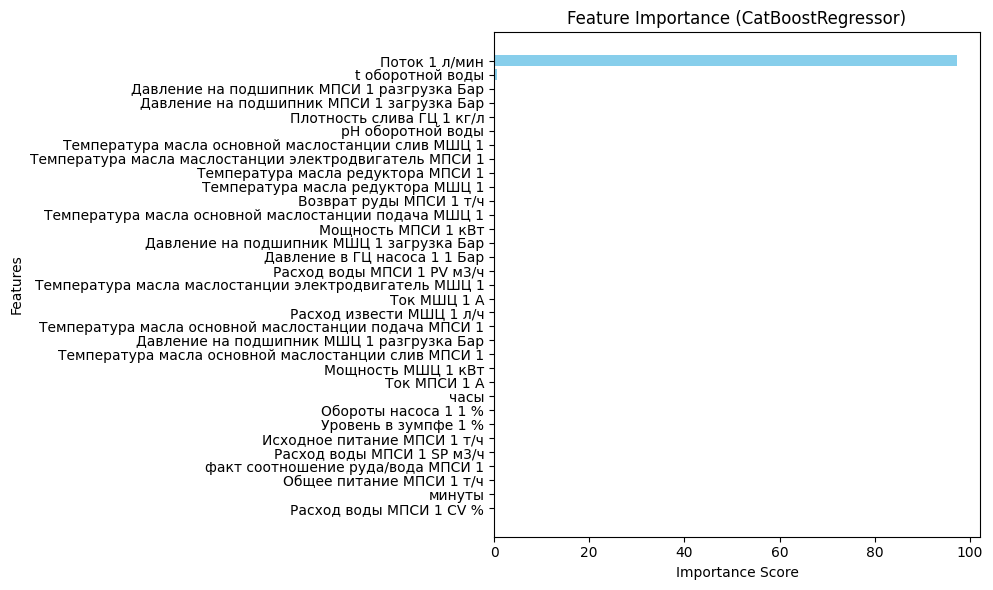

In [43]:
feature_importance = CB.get_feature_importance()

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (CatBoostRegressor)')
plt.gca().invert_yaxis()  # Самые важные признаки сверху
plt.tight_layout()

print(CB.get_feature_importance())
plt.show()

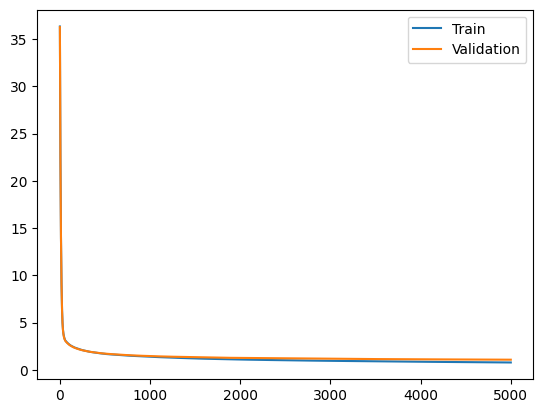

In [44]:
results = CB.get_evals_result()
plt.plot(results['learn']['RMSE'], label='Train')
plt.plot(results['validation']['RMSE'], label='Validation')
plt.legend()
plt.show()

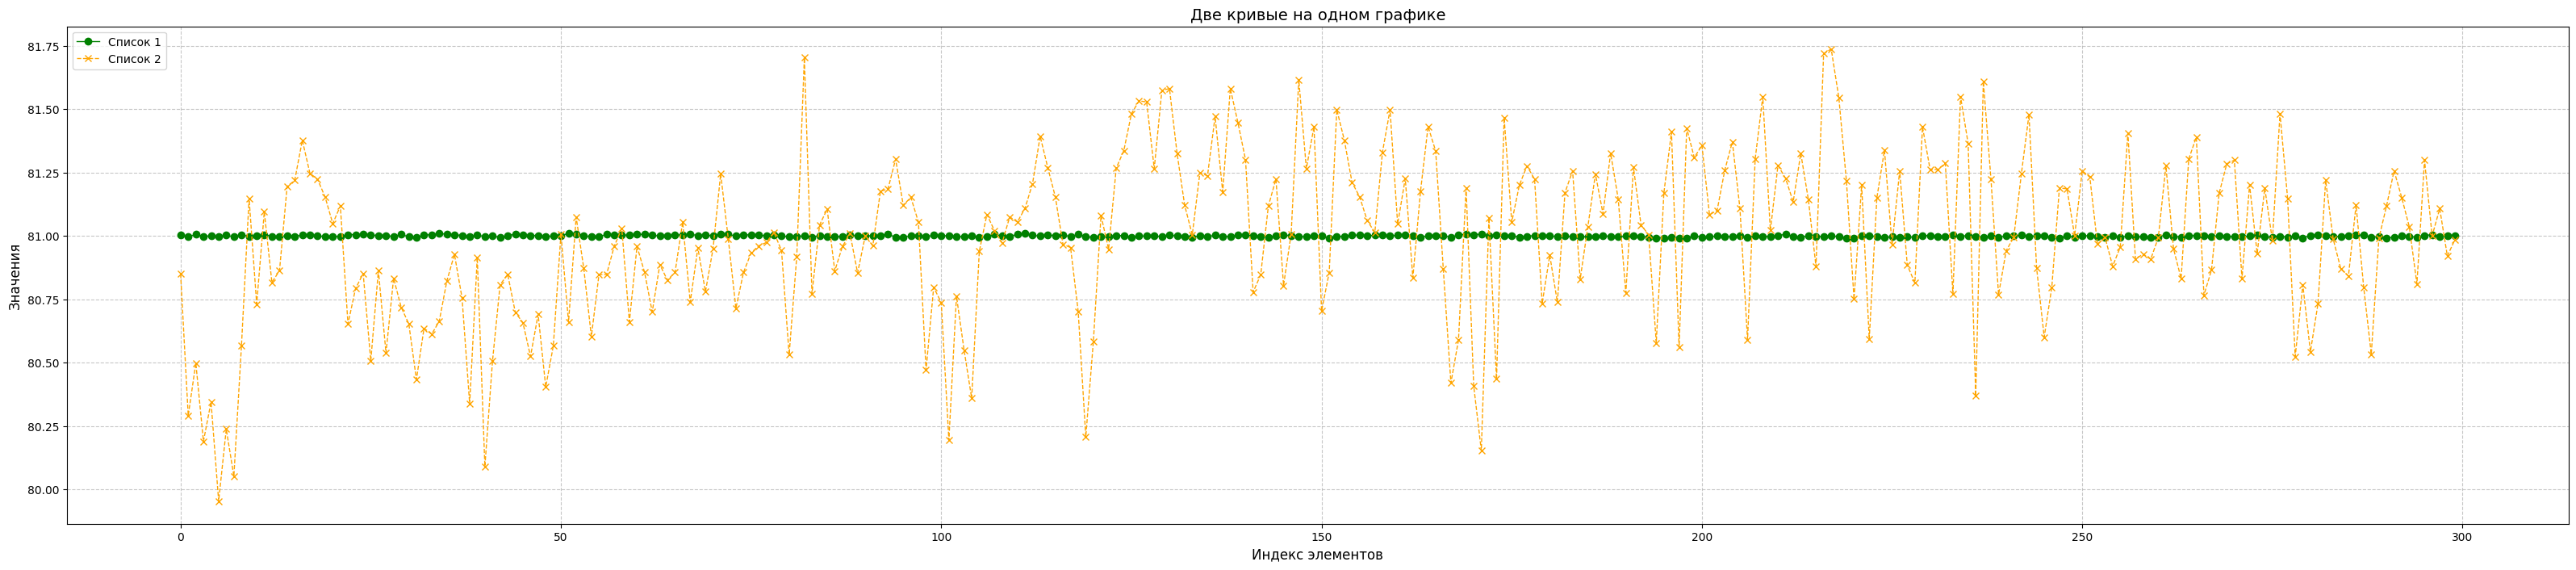

In [46]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
res = CB.predict(trand_X)

x1 = list(range(len(trand_y)))
plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')             
plt.grid(True, linestyle='--', alpha=0.7) 

plt.show()
#plt.savefig('plot_trand.png')

In [47]:
CB.save_model('C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/CatBoost_model.cbm')

# LightGBM  +

In [49]:
scaler_LGBM = StandardScaler()
X_train_LGBM = pd.DataFrame(columns=X_train.columns)
X_test_LGBM = pd.DataFrame(columns=X_test.columns)
X_train_LGBM[X_train_LGBM.columns] = scaler_LGBM.fit_transform(X_train)
X_test_LGBM[X_test_LGBM.columns] = scaler_LGBM.transform(X_test)
dump(scaler_LGBM, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_LGBM.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_LGBM.joblib']

In [51]:
LGBM = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=10000,
    learning_rate=0.1,
    max_depth=6,
    num_leaves=67,
    min_data_in_leaf=10,    
    lambda_l1=0.15,          
    lambda_l2=2,            
    feature_fraction=0.8,   
    bagging_fraction=0.9,   
    random_state=42,
    n_jobs=-1,
)

LGBM.fit(
    X_train_LGBM, y_train,
    eval_set=[(X_train_LGBM, y_train), (X_test_LGBM, y_test)],
    eval_metric='rmse',
)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15
[

,boosting_type,'gbdt'
,num_leaves,67
,max_depth,6
,learning_rate,0.1
,n_estimators,10000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


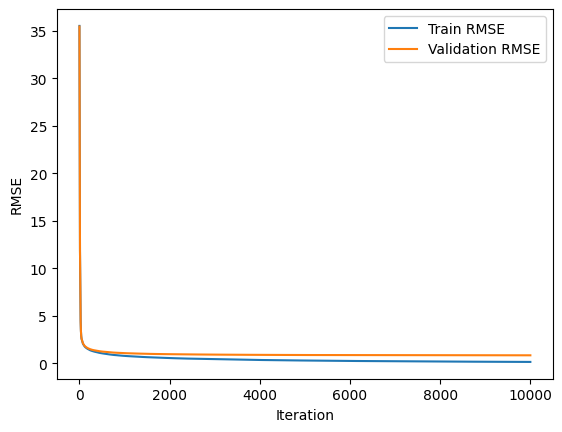

In [58]:
results_LGBM = LGBM.evals_result_
train_rmse = results_LGBM['training']['rmse']
valid_rmse = results_LGBM['valid_1']['rmse']  

plt.plot(train_rmse, label='Train RMSE')
plt.plot(valid_rmse, label='Validation RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current 

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

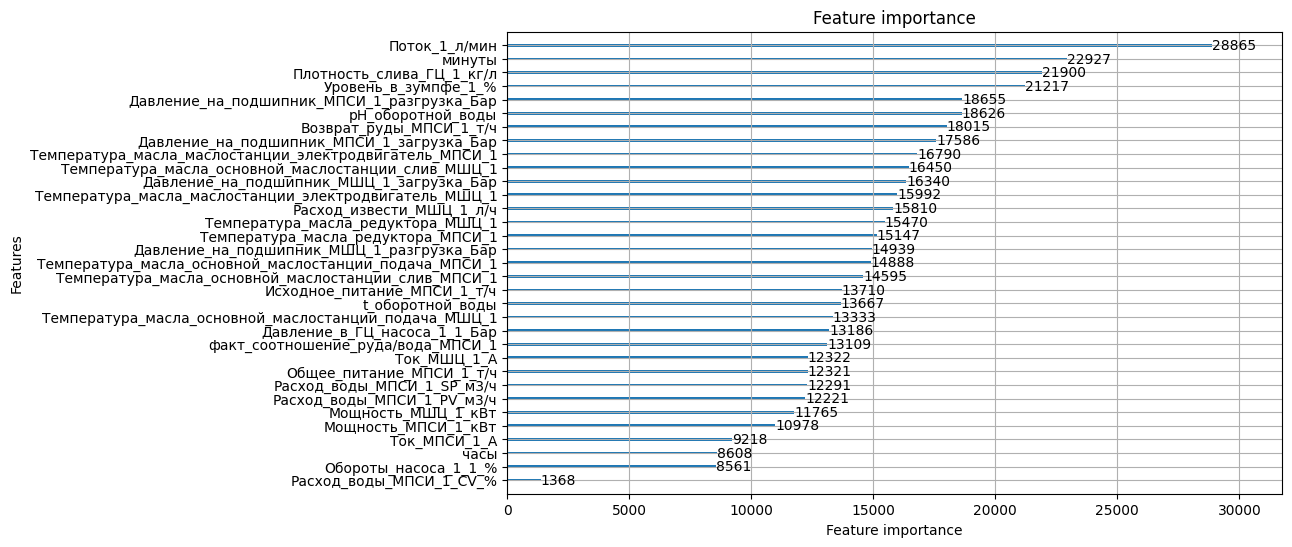

In [52]:
y_pred_train_LGBM = LGBM.predict(X_train_LGBM)
y_pred_test_LGBM = LGBM.predict(X_test_LGBM)

print(f'TRAIN:\n{r2_score(y_pred_train_LGBM, y_train)}')
print(mean_absolute_error(y_pred_train_LGBM, y_train))
print(mean_squared_error(y_pred_train_LGBM, y_train))

print(f'TEST:\n{r2_score(y_pred_test_LGBM, y_test)}')
print(mean_absolute_error(y_pred_test_LGBM, y_test))
print(mean_squared_error(y_pred_test_LGBM, y_test))

lgb.plot_importance(LGBM, figsize=(10, 6))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


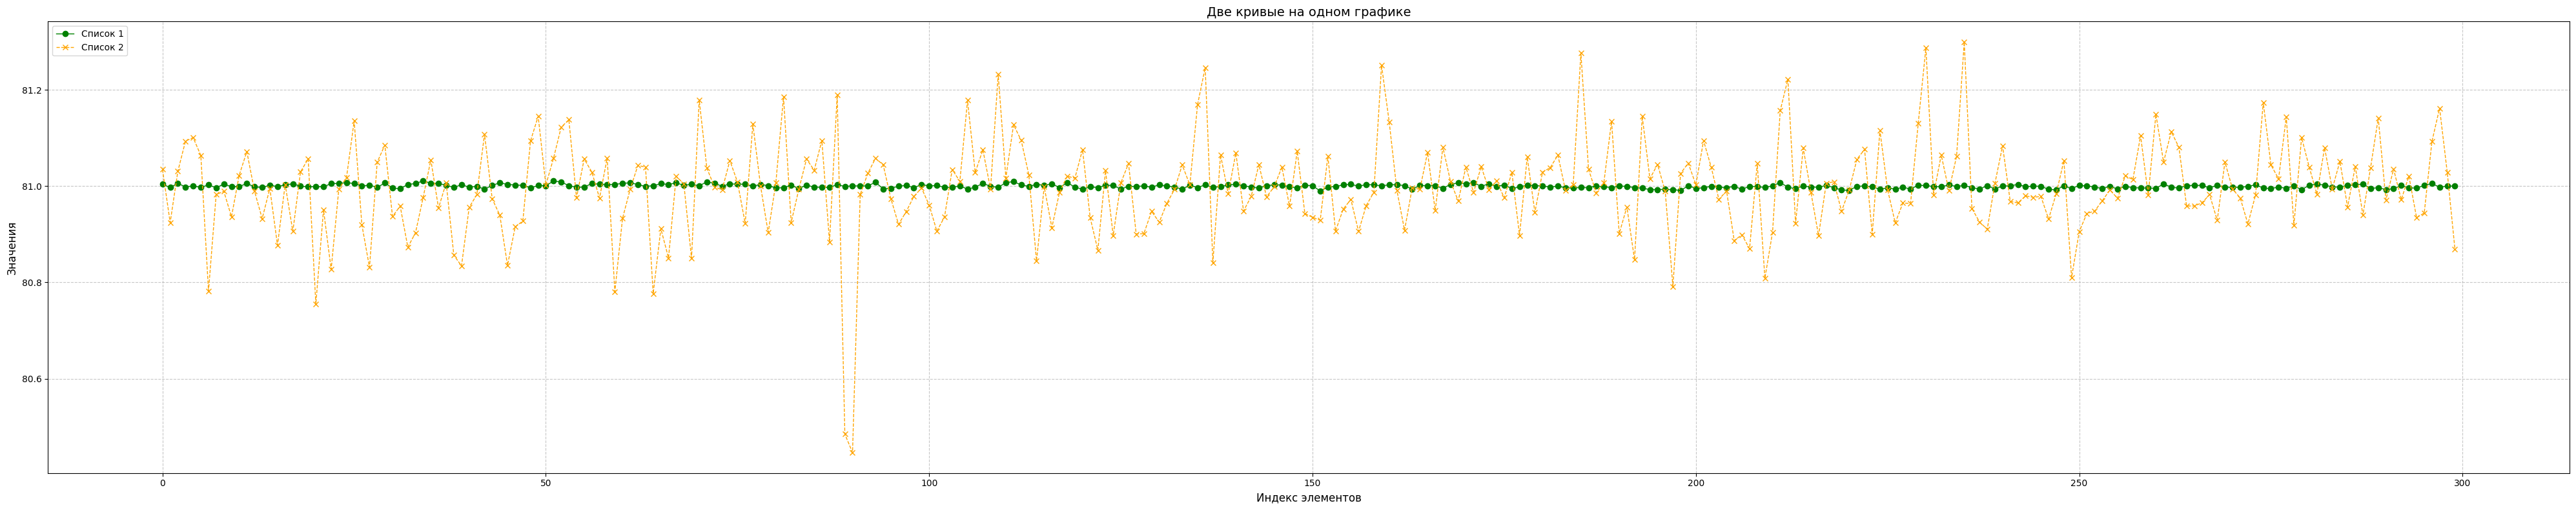

In [54]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
trand_X[trand_X.columns] = scaler_LGBM.transform(trand_X[trand_X.columns])
res = LGBM.predict(trand_X)

x1 = list(range(len(trand_y)))
plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')               
plt.grid(True, linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()
#plt.savefig('plot_trand.png')

In [ ]:
dump(LGBM, "ccModels/LightGBM_model.pkl")

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/LightGBM_model.pkl']

# KNN   

In [59]:
scaler_KNN = StandardScaler()
X_train_KNN = pd.DataFrame(columns=X_train.columns)
X_test_KNN = pd.DataFrame(columns=X_test.columns)
X_train_KNN = scaler_KNN.fit_transform(X_train)
X_test_KNN = scaler_KNN.transform(X_test)
dump(scaler_KNN, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_KNN.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Scalers/scaler_KNN.joblib']

In [60]:
knn = KNeighborsRegressor(
    n_neighbors=18,
    algorithm='brute',  # или 'ball_tree', 'brute'
    leaf_size=30,
    metric='minkowski',
    p=2,
    n_jobs=-1,
    weights='distance'
)

knn.fit(X_train_KNN, y_train)

,n_neighbors,18
,weights,'distance'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [61]:
y_pred_train_KNN = knn.predict(X_train_KNN)
y_pred_test_KNN = knn.predict(X_test_KNN)

print(f'TRAIN:\n{r2_score(y_pred_train_KNN, y_train)}')
print(mean_absolute_error(y_pred_train_KNN, y_train))
print(mean_squared_error(y_pred_train_KNN, y_train))

print(f'TEST:\n{r2_score(y_pred_test_KNN, y_test)}')
print(mean_absolute_error(y_pred_test_KNN, y_test))
print(mean_squared_error(y_pred_test_KNN, y_test))

TRAIN:
0.9999999999999963
3.478551824654145e-07
5.647617753486842e-12
TEST:
0.9971648523229631
0.4722514740809906
4.374222049201835


In [ ]:
feature_importance = {}
for i in range(X_train_KNN.shape[1]):
    X_permuted = X_test_KNN.copy()
    np.random.shuffle(X_permuted[:, i])
    permuted_accuracy = mean_squared_error(y_test, knn.predict(X_permuted))
    feature_importance[f'Feature {i}'] = y_pred_test_KNN - permuted_accuracy

print(feature_importance)

In [80]:
feature_importance['Feature 20']

array([-55.28191304, -55.28191304,  25.92257134, ...,  33.007432  ,
        24.58774346,  20.51864363])

c:\Users\mvideo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


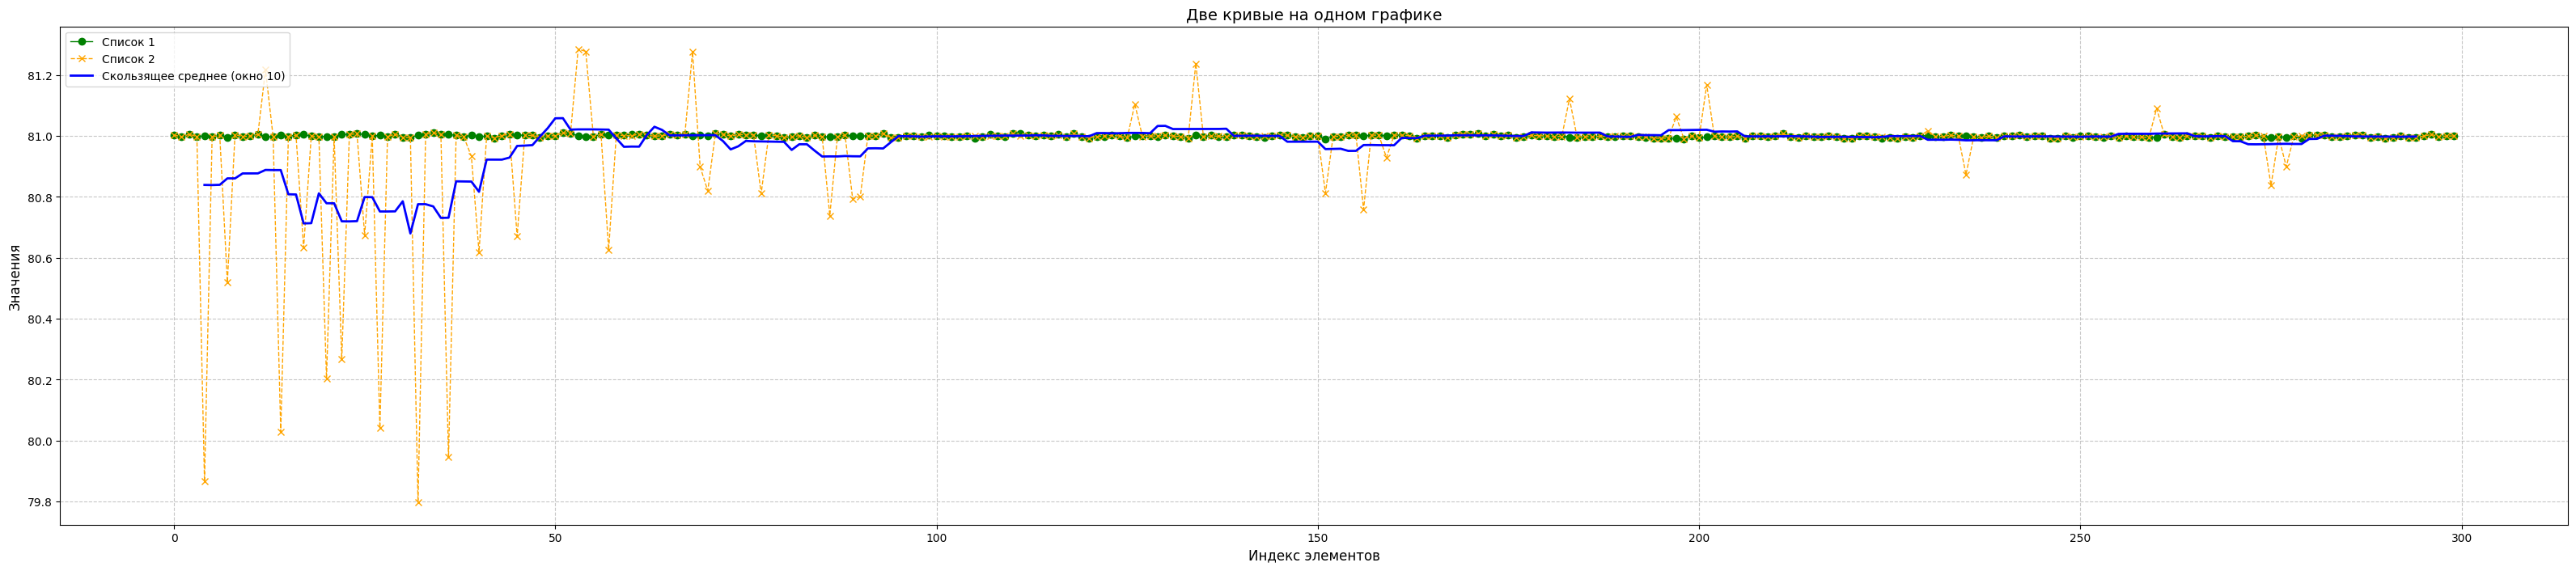

In [64]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
trand_X[trand_X.columns] = scaler_KNN.transform(trand_X[trand_X.columns])
res = knn.predict(trand_X)

window_size = 10
moving_avg = np.convolve(res, np.ones(window_size)/window_size, mode='valid')

x1 = list(range(len(trand_y)))
x_moving_avg = x1[(window_size//2):-(window_size//2)] if window_size % 2 == 1 else x1[(window_size//2)-1:-(window_size//2)]

plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.plot(x_moving_avg, moving_avg, color='blue', linewidth=2, label=f'Скользящее среднее (окно {window_size})')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')               
plt.grid(True, linestyle='--', alpha=0.7)  

plt.show()
#plt.savefig('plot_trand.png')

In [66]:
dump(knn, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/KNN_model.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/KNN_model.joblib']

# HistGradientBoostingRegressor

In [69]:
mmd = HistGradientBoostingRegressor(loss='squared_error', max_iter=850, max_depth=7, learning_rate=0.3, random_state=42, max_features=0.95)
mmd.fit(X_train, y_train)

,loss,'squared_error'
,quantile,None
,learning_rate,0.3
,max_iter,850
,max_leaf_nodes,31
,max_depth,7
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,0.95
,max_bins,255
,categorical_features,'from_dtype'


In [70]:
y_pred_train = mmd.predict(X_train)
y_pred_test = mmd.predict(X_test)

print(f'TRAIN:\n{r2_score(y_pred_train, y_train)}')
print(mean_absolute_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_train, y_train))

print(f'TEST:\n{r2_score(y_pred_test, y_test)}')
print(mean_absolute_error(y_pred_test, y_test))
print(mean_squared_error(y_pred_test, y_test))

TRAIN:
0.9997635034578543
0.27544793149254515
0.3677977648631929
TEST:
0.9993456104219649
0.38682464187589394
1.0138962047201543


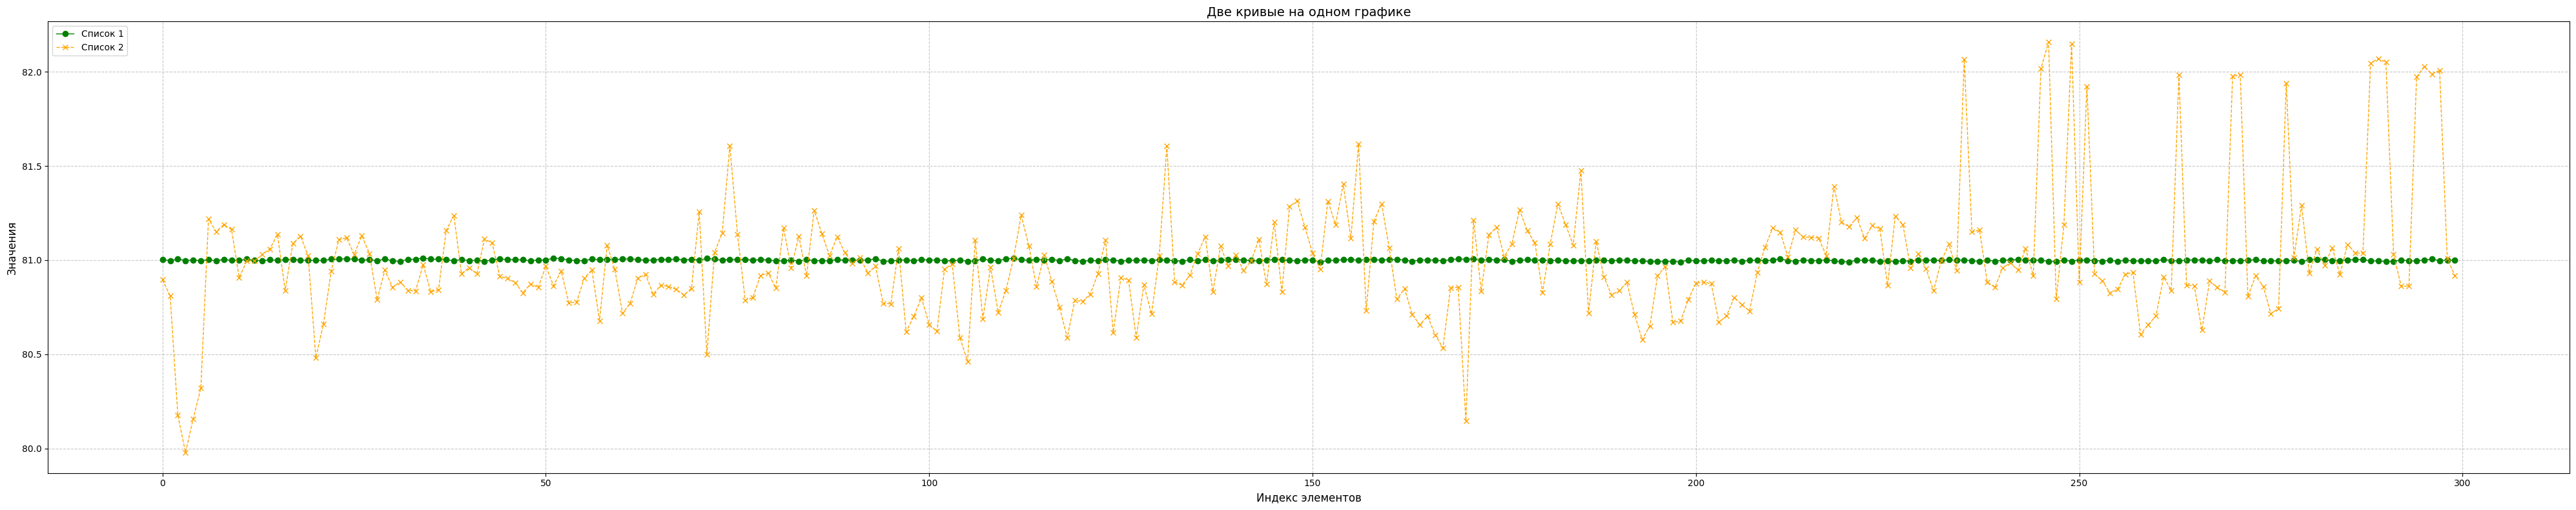

In [72]:
trand_X = dff.drop(columns=['Гранулометрия 1 %']).iloc[1000:1300]
trand_y = dff['Гранулометрия 1 %'].iloc[1000:1300]
res = mmd.predict(trand_X)

x1 = list(range(len(trand_y)))
plt.figure(figsize=(40, 8))

plt.plot(x1, trand_y, color='green', marker='o', linestyle='-', linewidth=1, label='Список 1')
plt.plot(x1, res, color='orange', marker='x', linestyle='--', linewidth=1, label='Список 2')

plt.xlabel('Индекс элементов', fontsize=12) 
plt.ylabel('Значения', fontsize=12)         
plt.title('Две кривые на одном графике', fontsize=14)
plt.legend(loc='upper left')               
plt.grid(True, linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()
#plt.savefig('plot_trand.png')

In [ ]:
dump(mmd, 'C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/HistGradientBoostingRegressor.joblib')

['C:/Users/mvideo/ho-ho/Решения хакатонов/Ситовые хар-ки/Models/HistGB.joblib']